# LGMVIP
#NAME : 
##TASK 1 : IRIS CLASSIFICATION

###IMPORTING MODULES

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from warnings import filterwarnings
filterwarnings(action='ignore')


###LOADING THE DATASET THROUGH URL

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df= pd.read_csv(url, names = attributes)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

###SUMMARISING THE DATASET

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

###VISUALIZING THE DATA

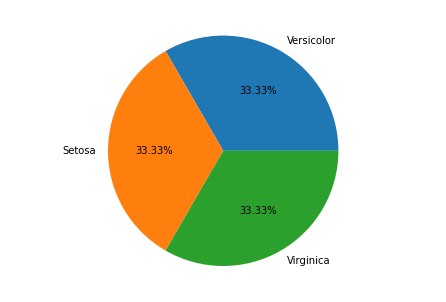

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

###SEPARAING TRAIN , TEST DATASET FROM THE DATAFRAME

In [ ]:

train, test = train_test_split(df, test_size = 0.4, stratify = df['class'], random_state = 42)

In [ ]:
train.groupby('class').size()

class
Iris-setosa        30
Iris-versicolor    30
Iris-virginica     30
dtype: int64

In [ ]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train['class']
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test['class']

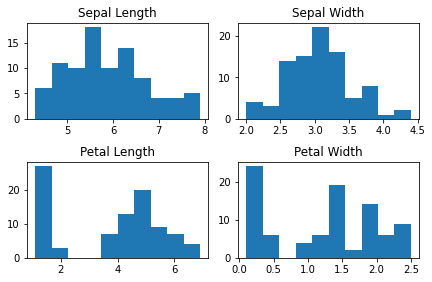

In [ ]:
# histograms
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);


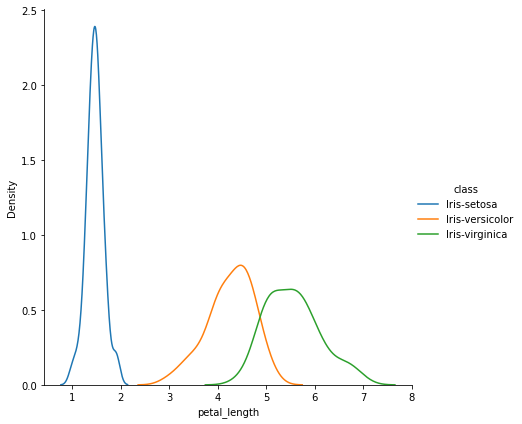

In [ ]:
sns.FacetGrid(df, hue="class", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()
   

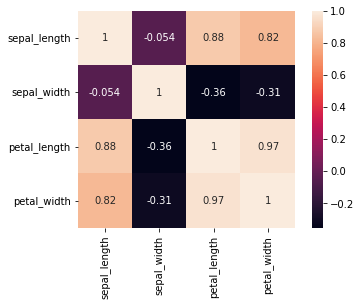

In [ ]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

#MODEL BUIDING & PREDICTING

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)


In [ ]:
y_test

40         Iris-setosa
61     Iris-versicolor
18         Iris-setosa
49         Iris-setosa
106     Iris-virginica
20         Iris-setosa
69     Iris-versicolor
93     Iris-versicolor
141     Iris-virginica
104     Iris-virginica
85     Iris-versicolor
78     Iris-versicolor
133     Iris-virginica
127     Iris-virginica
2          Iris-setosa
1          Iris-setosa
35         Iris-setosa
42         Iris-setosa
148     Iris-virginica
122     Iris-virginica
77     Iris-versicolor
98     Iris-versicolor
107     Iris-virginica
111     Iris-virginica
51     Iris-versicolor
132     Iris-virginica
116     Iris-virginica
36         Iris-setosa
123     Iris-virginica
23         Iris-setosa
145     Iris-virginica
97     Iris-versicolor
134     Iris-virginica
21         Iris-setosa
22         Iris-setosa
108     Iris-virginica
11         Iris-setosa
55     Iris-versicolor
7          Iris-setosa
147     Iris-virginica
56     Iris-versicolor
144     Iris-virginica
66     Iris-versicolor
63     Iris

In [ ]:
prediction

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iri

###SCATTER PLOT OF PREDICTON VS THE TEST SET

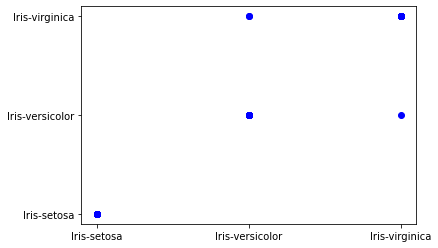

In [ ]:
plt.scatter(prediction,y_test,color='b')
plt.show()

#PRINTING THE ACCURACY OF OUR MODEL

In [ ]:
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 0.95
